# TASK 2 - Natural Language Processing

In [6]:
#importing the libraries
import numpy as np
import pandas as pd
import sklearn
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import regex as re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
initial_text=open('/content/drive/My Drive/Data/11-0.txt','r',encoding='utf8').read()
#initial_text

## Preprocessing the text

In [35]:
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    text = text.lower() #converting everything to lowercase

    index = text.find('alice’s evidence')
    text = text[index + len('alice’s evidence'):] #deleting all the text before the actual book

    index_=text.find('end of the project gutenberg ebook')
    text=text[:index_] #deleting all the copyrights after THE END

    # removing non-alphabetic characters
    text=re.sub('\n',' ',text) #new line symbols
    text = re.sub(r'[^\w\s]', '', text) #everything that is not a word or a space
    text = re.sub('_',' ',text) #underscores
    text = re.sub('<.*?>',' ',text) #tags

    tokens = TreebankWordTokenizer().tokenize(text)  #  tokenizing the text

  #removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

      # lemmatization using spaCy
    nlp = spacy.load('en_core_web_sm')
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    #joining  the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text


text = clean_text(initial_text)
#text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Top 10 most used words per chapter

Chapter 1: little, mouse, im, said, dear, go, foot, thing, like, must
------------------------------

Chapter 2: said, mouse, dodo, know, one, soon, bird, dry, long, lory
------------------------------

Chapter 3: little, one, rabbit, said, bill, get, heard, sure, thought, came
------------------------------

Chapter 4: said, caterpillar, im, pigeon, serpent, little, well, ive, minute, know
------------------------------

Chapter 5: said, cat, like, duchess, little, footman, much, baby, know, mad
------------------------------

Chapter 6: said, hatter, dormouse, hare, march, time, know, thing, well, one
------------------------------

Chapter 7: said, queen, head, king, cat, three, hedgehog, like, one, went
------------------------------

Chapter 8: said, turtle, mock, gryphon, duchess, queen, went, dont, little, never
------------------------------

Chapter 9: said, gryphon, turtle, mock, would, lobster, dance, beautiful, soup, voice
------------------------------

Chapter 10: said, k

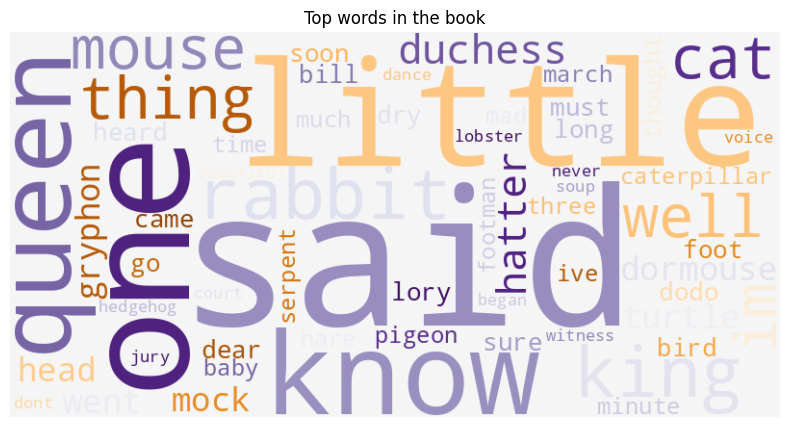

In [36]:
def top_words(text, n=10):
    chapter_ = re.compile(r'chapter [ivxl]+')  # regular expression identifying the chapters in the text

    boundaries = [match.start() for match in chapter_.finditer(text)]  # defining the boundaries of chapters

    chapters = [text[start:end].strip() for start, end in zip(boundaries, boundaries[1:] + [None])]  # splitting the text

    stop_words = stopwords.words('english')  # the list of English stop words
    stop_words = stop_words + ['alice']  # adding Alice's name to the stop word list :(

    tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)  # tfidf vectorizer
    top_per_chapter = []

    for i, chapter in enumerate(chapters, 1):
        tfidf_matrix = tfidf_vectorizer.fit_transform([chapter])  # fitting the chapter

        feature_names = tfidf_vectorizer.get_feature_names_out()
        tfidf_values = tfidf_matrix.toarray()[0]

        word_tfidf_tuples = list(zip(feature_names, tfidf_values))  # combining words and their vector

        sorted_word_tfidf = sorted(word_tfidf_tuples, key=lambda x: x[1], reverse=True)  # sorting

        top_words = [word for word, _ in sorted_word_tfidf[:n]]  # finding top 10 words

        top_per_chapter.append((f"Chapter {i}", top_words))

    return top_per_chapter


most_top_10 = top_words(text)

for chapter, top_words in most_top_10:  # the result
    print(f"{chapter}: {', '.join(top_words)}\n{'-' * 30}\n")

# all 10 top words from all chapters into a single string
all_top_words = ' '.join(' '.join(words) for _, words in most_top_10)

wordcloud = WordCloud(width=800, height=400, colormap='PuOr',  # generating a common word cloud for fun
                      background_color='whitesmoke', ).generate(all_top_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top words in the book')
plt.show()


# New chapter's names:


1.   Think this way, see no one
1.   Little mouse said 'oh, dear'
1.   Mouse knows dodo
1.   Rabbit got a bill and heard 'em coming
1.   Catepillar, pigeon and serpent i've known
1.   Cat likes mad dutches' little baby much
1.   Hatter, dormouse, and hare know time well
1.   Queen said to  behead the three kings and one cat
1.   Turtule mocks the gryphon, the duchess, and the queen
1.   said, gryphon said ' mocking turtle would dance beautifully'
1.   king, hatter, and  dormouse visit the court and witness the queen began screaming
1.   The jury and one white rabbit said  'king knew queen very little'




## Most used verbes in sentences with Alice's name

I am creating a different version of precessed initial text by leaving the stops '.' in so i can figure out where the sentences begin and end.

In [43]:
def clean_text_sentences(text):
    text = text.lower() #converting everything to lowercase

    index = text.find('alice’s evidence')
    text = text[index + len('alice’s evidence'):] #deleting all the text before the actual book

    index_=text.find('end of the project gutenberg ebook')
    text=text[:index_] #deleting all the copyrights after THE END

    # removing non-alphabetic characters
    text=re.sub('\n',' ',text) #new line symbols
    text = re.sub(r'[^\w\s\.]', '', text) #everything that is not a word, or a . or a space
    text = re.sub('_',' ',text) #underscores
    text = re.sub('<.*?>',' ',text) #tags

    tokens = TreebankWordTokenizer().tokenize(text)  #  tokenizing the text

  #removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

      # lemmatization using spaCy
    nlp = spacy.load('en_core_web_sm')
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    #joining  the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return text


alice_text = clean_text_sentences(initial_text)
#alice_text

The fuction that will find top 10 most used verbs

In [42]:
def top_activities(text_in, top_n=10):
    nlp = spacy.load('en_core_web_sm')

    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text_in)     #splitting the text into sentences

    verb_counter = Counter()

    for sentence in sentences: #counting the frequancies
        if 'alice' in sentence: #checking for name to be in the sentence
            doc = nlp(sentence)
            verbs = [token.lemma_ for token in doc if token.pos_ == 'VERB'] #extracting verbs only
            verb_counter.update(verbs) #updating the count
    top_verbs = verb_counter.most_common(top_n) #selecting top 10

    return top_verbs

top_verbs = top_activities(alice_text)

print("Top 10 verbs in sentences with the name Alice:")
for verb, count in top_verbs:
    print(f"{verb}: {count}")


Top 10 verbs in sentences with the word 'alice':
say: 250
go: 97
think: 85
get: 65
look: 58
see: 56
have: 53
come: 51
know: 48
begin: 47


So Alice mostly says things - interacting with characters. Then she equal parts goes places and thinks. Next big group is exploring - get, look and see are the verbs responsible for that.